<a href="https://colab.research.google.com/github/patriciogs/03MIAR-Algoritmos-de-Optimizacion-2024/blob/main/Algoritmos_AG4_Patricio_Galdames_Sepulveda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG4 - Actividad Guiada 4
Nombre: Patricio Galdames Sepúlveda <br>
Link:   https://colab.research.google.com/drive/1xkC6lLvgvAy6PY257CKibOhXTkaCOS0u?usp=sharing <br>
Github: https://github.com/patriciogs/03MIAR-Algoritmos-de-Optimizacion-2024
<br>


#Carga de librerias

In [8]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [9]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [10]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [11]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



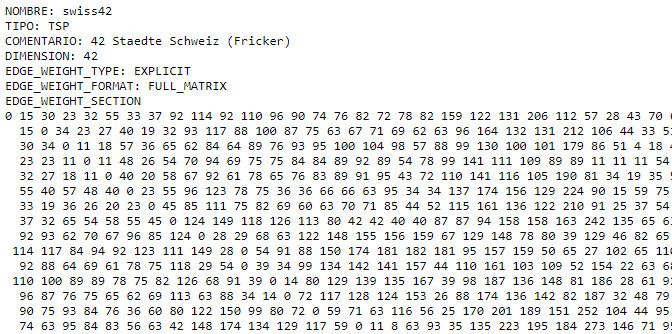

In [12]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [13]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 31, 37, 23, 12, 18, 36, 40, 19, 32, 15, 10, 11, 28, 8, 24, 22, 2, 20, 27, 34, 38, 14, 1, 6, 26, 39, 13, 3, 21, 41, 30, 35, 25, 17, 29, 5, 9, 33, 16, 4, 7]
4880


#BUSQUEDA ALEATORIA

In [14]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 150000)

Mejor solución: [0, 10, 17, 21, 9, 41, 29, 30, 33, 27, 26, 5, 16, 15, 13, 22, 25, 11, 23, 24, 39, 28, 2, 35, 36, 19, 18, 12, 8, 40, 34, 20, 7, 31, 37, 32, 14, 4, 38, 1, 6, 3]
Distancia     : 3421


#BUSQUEDA LOCAL

In [15]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3421
Distancia Mejor Solucion Local: 3152


In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      #print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      #print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

# Búsqueda local con Entornos variables (Propuesta)

Mi idea y de acuerdo a lo sugerido por el profesor en clases, es aumentar el tamaño del vecindario de un elemento que se desea intercambiar con otro vecindario de otro elemento de la lista a cambiar. En la medida que la busqueda local falla, vamos aumentando paulatinamente el tamaño del vecindario a intercambiar. Llamaremos "ajuste" al metodo que ejecutará el ajuste por vecindario. Probaremos varios enfoques

## Primera Variante: Ajustando mediante suffle de secciones de la lista
Dividimos lista en secciones de tamaño k y aplicamos un suffle a cada sección. La idea es iniciar el suffle con k=2 y en la medida que no se logra una mejora (una lista/solución de menor costo) se aumenta el tamaño de k.


In [17]:
def agitar_con_shuffle_secciones(solucion, k):
    """
    Agita una solución por secciones de tamaño k, aplicando un shuffle a cada sección.

    Args:
        solucion: Lista que representa el orden de las ciudades
        k: Tamaño de la sección a agitar

    Returns:
        Lista con las secciones agitadas
    """
    solucion_agitada = solucion.copy()
    n = len(solucion)

    # Procesamos la lista por secciones de tamaño k
    for inicio in range(0, n, k):
        # Calculamos el final de la sección, sin pasarnos del tamaño de la lista
        fin = min(inicio + k, n)

        # Extraemos la sección actual
        seccion = solucion_agitada[inicio:fin]

        # Aplicamos el shuffle a la sección
        random.shuffle(seccion)

        # Reinsertamos la sección agitada
        solucion_agitada[inicio:fin] = seccion

    return solucion_agitada

In [43]:
def busqueda_local_entornos_variables_v1(solucion_inicial, problem, max_iter=10):
    """
    busqueda local con agitación progresiva
    """
    mejor_solucion = solucion_inicial.copy()
    mejor_distancia = distancia_total(mejor_solucion, problem)
    Iter = found_iter = 0
    kmax = (int) (0.6 * len(solucion_inicial))
    iter = 0;
    threshold = 50
    for iteracion in range(max_iter):
        k = 1
        while k <= kmax:
            # Agitamos con intensidad k
            solucion_agitada = agitar_con_shuffle_secciones(mejor_solucion, kmax)

            # Aplicamos búsqueda local a la solución agitada
            solucion_local = busqueda_local(solucion_agitada, problem)
            distancia_local = distancia_total(solucion_local, problem)

            if distancia_local < mejor_distancia:
                mejor_solucion = solucion_local.copy()
                mejor_distancia = distancia_local
                k = 1  # Reiniciamos k cuando encontramos mejora
                print(f"En iteracion {iter}, la nueva mejor solución encontrada: {mejor_distancia}")
                found_iter = iter
            else:
                k += 1  # Incrementamos el nivel de perturbación
            iter +=1
        if (iter-found_iter) > threshold: # Si no se encuentra un nuevo optimo en un periodo "largo" de tiempo, se retorna
          break

    print("La mejor solución encontrada es:" , mejor_solucion)
    print(f"Nueva mejor solución encontrada: {mejor_distancia}")
    return mejor_solucion

nueva_sol_v1 = busqueda_local_entornos_variables_v1(sol, problem )

En iteracion 0, la nueva mejor solución encontrada: 1599
En iteracion 1, la nueva mejor solución encontrada: 1582
En iteracion 3, la nueva mejor solución encontrada: 1575
En iteracion 14, la nueva mejor solución encontrada: 1564
En iteracion 15, la nueva mejor solución encontrada: 1549
La mejor solución encontrada es: [32, 0, 3, 10, 25, 11, 12, 18, 26, 4, 2, 27, 28, 30, 29, 8, 9, 21, 24, 40, 23, 41, 39, 22, 38, 20, 31, 17, 7, 1, 6, 5, 13, 19, 14, 16, 15, 37, 36, 35, 33, 34]
Nueva mejor solución encontrada: 1549


# Segunda Variante: Agitar usando un merge de secciones consecutivas
La idea es seleccionar dos secciones consecutivas de tamaño k y mezclarlas. Al igual que el caso anterior, la idea es iniciar con un k pequeño, que se incrementa en la medida que no se logra una mejora (reducción del costo)


In [44]:
def agitar_por_merge(solucion, k):
    """
    Agita una solución combinando secciones consecutivas de tamaño k.
    Maneja de forma segura los límites del arreglo.

    Args:
        solucion: Lista que representa el orden de las ciudades
        k: Tamaño objetivo de cada sección a combinar

    Returns:
        Nueva solución con secciones combinadas
    """
    solucion_agitada = solucion.copy()
    n = len(solucion)

    # Si k es mayor que la mitad del tamaño del arreglo, lo ajustamos
    k = min(k, n // 2)

    # Procesamos la lista por pares de secciones consecutivas
    for inicio in range(0, n, 2*k):
        # Calculamos los límites de manera segura
        medio = min(inicio + k, n)
        fin = min(inicio + 2*k, n)

        # Solo hacemos merge si tenemos al menos dos elementos
        if fin - inicio > 1:
            # Obtenemos las dos secciones
            seccion1 = solucion_agitada[inicio:medio]
            seccion2 = solucion_agitada[medio:fin]

            # Solo hacemos merge si ambas secciones tienen elementos
            if seccion1 and seccion2:
                seccion_combinada = merge_secciones(seccion1, seccion2)
                solucion_agitada[inicio:fin] = seccion_combinada

    return solucion_agitada

def merge_secciones(seccion1, seccion2):
    """
    Combina dos secciones del recorrido de manera inteligente.

    Args:
        seccion1: Primera sección del recorrido
        seccion2: Segunda sección del recorrido

    Returns:
        Lista combinada manteniendo algunas propiedades de adyacencia
    """
    # Creamos una lista con todos los elementos
    elementos = list(seccion1) + list(seccion2)
    resultado = []

    while elementos:
        if len(elementos) == 1:
            resultado.extend(elementos)
            break

        # Elegimos aleatoriamente si tomamos del principio o del final
        if random.random() < 0.5:
            resultado.append(elementos.pop(0))
        else:
            resultado.append(elementos.pop())

    return resultado

## Probando ...

In [45]:
def busqueda_local_entornos_variables_v2(solucion_inicial, problem, max_iter=10):
    """
    busqueda local con agitación progresiva
    """
    mejor_solucion = solucion_inicial.copy()
    mejor_distancia = distancia_total(mejor_solucion, problem)
    Iter = found_iter = 0
    kmax = (int) (0.6 * len(solucion_inicial))
    iter = 0;
    threshold = 50
    for iteracion in range(max_iter):
        k = 1
        while k <= kmax:
            # Agitamos con intensidad k
            #solucion_agitada = agitar_con_shuffle_secciones(mejor_solucion, kmax)
            solucion_agitada = agitar_por_merge(mejor_solucion, kmax)

            # Aplicamos búsqueda local a la solución agitada
            solucion_local = busqueda_local(solucion_agitada, problem)
            distancia_local = distancia_total(solucion_local, problem)

            if distancia_local < mejor_distancia:
                mejor_solucion = solucion_local.copy()
                mejor_distancia = distancia_local
                k = 1  # Reiniciamos k cuando encontramos mejora
                print(f"En iteracion {iter}, la nueva mejor solución encontrada: {mejor_distancia}")
                found_iter = iter
            else:
                k += 1  # Incrementamos el nivel de perturbación
            iter +=1
        if (iter-found_iter) > threshold: # Si no se encuentra un nuevo optimo en un periodo "largo" de tiempo, se retorna
          break

    print("La mejor solución encontrada es:" , mejor_solucion)
    print(f"Nueva mejor solución encontrada: {mejor_distancia}")
    return mejor_solucion

nueva_sol_v2 = busqueda_local_entornos_variables_v2(sol, problem )

En iteracion 1, la nueva mejor solución encontrada: 1620
En iteracion 22, la nueva mejor solución encontrada: 1610
En iteracion 24, la nueva mejor solución encontrada: 1565
En iteracion 28, la nueva mejor solución encontrada: 1550
En iteracion 35, la nueva mejor solución encontrada: 1531
En iteracion 55, la nueva mejor solución encontrada: 1518
La mejor solución encontrada es: [32, 34, 33, 20, 35, 36, 31, 17, 7, 37, 15, 16, 14, 19, 13, 5, 26, 12, 11, 25, 10, 41, 23, 40, 24, 21, 39, 9, 8, 18, 4, 29, 22, 38, 0, 1, 6, 3, 2, 27, 28, 30]
Nueva mejor solución encontrada: 1518


In [46]:
nueva_sol_3 = busqueda_local_entornos_variables_v2(nueva_sol_v1, problem )

En iteracion 12, la nueva mejor solución encontrada: 1507
La mejor solución encontrada es: [34, 20, 35, 36, 31, 17, 37, 15, 16, 14, 7, 5, 19, 13, 11, 12, 18, 26, 6, 4, 27, 3, 1, 0, 32, 30, 29, 28, 2, 10, 25, 41, 23, 40, 24, 21, 39, 9, 8, 22, 38, 33]
Nueva mejor solución encontrada: 1507


#SIMULATED ANNEALING


In [47]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [48]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 33, 34, 4, 6, 18, 12, 11, 9, 23, 40, 24, 21, 39, 22, 38, 30, 29, 28, 32, 17, 37, 16, 14, 31, 36, 35, 20, 1, 7, 15, 19, 13, 5, 26, 3, 27, 2, 10, 25, 41, 8]
con una distancia total de 1896


# Mejorar función  genera_vecina_aleatorio() de Simulate Annealing

In [50]:
# consideramos varios criterios para generar_vecina
def generar_vecina_2opt(solucion):
    """
    Genera una solución vecina usando el operador 2-opt.
    Este operador invierte una subsecuencia del recorrido.

    Args:
        solucion: Lista que representa el orden actual de las ciudades

    Returns:
        Nueva solución generada por inversión de una subsecuencia
    """
    vecina = solucion.copy()
    n = len(vecina)

    # Seleccionamos dos puntos de corte aleatorios
    i, j = sorted(random.sample(range(n), 2))

    # Invertimos la subsecuencia entre estos puntos
    vecina[i:j] = reversed(vecina[i:j])

    return vecina

def generar_vecina_insertion(solucion):
    """
    Genera una solución vecina usando el operador de inserción.
    Toma una ciudad y la inserta en una nueva posición.

    Args:
        solucion: Lista que representa el orden actual de las ciudades

    Returns:
        Nueva solución generada por inserción
    """
    vecina = solucion.copy()
    n = len(vecina)

    # Seleccionamos una ciudad aleatoria y una nueva posición
    origen = random.randint(0, n-1)
    ciudad = vecina.pop(origen)
    destino = random.randint(0, n-1)

    # Insertamos la ciudad en su nueva posición
    vecina.insert(destino, ciudad)

    return vecina

def generar_vecina_swap_blocks(solucion, k=3):
    """
    Genera una solución vecina intercambiando dos bloques de k ciudades.

    Args:
        solucion: Lista que representa el orden actual de las ciudades
        k: Tamaño de los bloques a intercambiar

    Returns:
        Nueva solución generada por intercambio de bloques
    """
    vecina = solucion.copy()
    n = len(vecina)

    # Aseguramos que k no sea mayor que la mitad del recorrido
    k = min(k, n // 3)

    # Seleccionamos dos posiciones iniciales para los bloques
    pos1 = random.randint(0, n - k)
    pos2 = random.randint(0, n - k)

    # Evitamos que los bloques se superpongan
    while abs(pos1 - pos2) < k:
        pos2 = random.randint(0, n - k)

    # Intercambiamos los bloques
    for i in range(k):
        vecina[pos1 + i], vecina[pos2 + i] = vecina[pos2 + i], vecina[pos1 + i]

    return vecina

In [64]:
def genera_vecina(solucion, metodo='2opt', **kwargs):
    """
    Función general para generar vecinos usando diferentes métodos.

    Args:
        solucion: Lista que representa el orden actual de las ciudades
        metodo: Método de generación de vecinos a utilizar ('2opt', 'insertion', 'swap_blocks')
        **kwargs: Argumentos adicionales específicos de cada método

    Returns:
        Nueva solución generada según el método especificado
    """
    generadores = {
        '2opt': generar_vecina_2opt,
        'insertion': generar_vecina_insertion,
        'swap_blocks': generar_vecina_swap_blocks
    }

    if metodo not in generadores:
        raise ValueError(f"Método {metodo} no reconocido")

    return generadores[metodo](solucion, **kwargs)

In [68]:
def recocido_simulado_v2(problem, temperatura, funcion_genera_vecina=genera_vecina_aleatorio):
    """
    Implementación del algoritmo de recocido simulado que acepta diferentes
    funciones para generar vecinos.

    Args:
        problem: Instancia del problema TSP con los datos necesarios
        TEMPERATURA: Temperatura inicial del sistema
        funcion_genera_vecina: Función que genera una solución vecina
                              (por defecto usa genera_vecina_aleatorio)

    Returns:
        mejor_solucion: La mejor solución encontrada durante todo el proceso
    """
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)
    mejor_solucion = []             # x* del seudocodigo
    mejor_distancia = 10e100        # F* del seudocodigo
    N = 0

    while temperatura > .0001:
        N += 1
        # Usamos la función de generación de vecinos proporcionada
        vecina = funcion_genera_vecina(solucion_referencia)

        # El resto del algoritmo permanece igual
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina
            mejor_distancia = distancia_vecina

        if distancia_vecina < distancia_referencia or probabilidad(temperatura, abs(distancia_referencia - distancia_vecina)):
            solucion_referencia = vecina
            distancia_referencia = distancia_vecina

        temperatura = bajar_temperatura(temperatura)

    print("La mejor solución encontrada es ", end="")
    print(mejor_solucion)
    print("con una distancia total de ", end="")
    print(mejor_distancia)
    return mejor_solucion

In [69]:
# Usando el recocido simulado con diferentes generadores de vecinos
solucion_2opt = recocido_simulado_v2(problem, temperatura=1000,
                                 funcion_genera_vecina=lambda s: genera_vecina(s, '2opt'))

solucion_insertion = recocido_simulado_v2(problem, temperatura=1000,
                                     funcion_genera_vecina=lambda s: genera_vecina(s, 'insertion'))

solucion_blocks = recocido_simulado_v2(problem, temperatura=1000,
                                  funcion_genera_vecina=lambda s: genera_vecina(s, 'swap_blocks', k=3))

La mejor solución encontrada es [16, 14, 19, 13, 5, 26, 18, 11, 12, 10, 25, 23, 41, 8, 6, 4, 1, 0, 3, 2, 27, 28, 30, 29, 9, 21, 24, 40, 39, 22, 38, 32, 20, 33, 34, 35, 36, 31, 17, 7, 37, 15]
con una distancia total de 1474
La mejor solución encontrada es [0, 27, 2, 3, 4, 10, 8, 30, 32, 34, 33, 20, 6, 1, 37, 15, 16, 14, 19, 13, 18, 28, 29, 9, 21, 39, 22, 38, 24, 40, 23, 41, 25, 11, 12, 26, 5, 7, 17, 31, 36, 35]
con una distancia total de 1740
La mejor solución encontrada es [31, 1, 0, 2, 3, 6, 14, 7, 16, 15, 37, 36, 34, 20, 33, 32, 27, 28, 38, 30, 26, 18, 4, 5, 19, 13, 12, 25, 11, 10, 8, 29, 9, 23, 41, 40, 21, 24, 39, 22, 35, 17]
con una distancia total de 2056


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [70]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


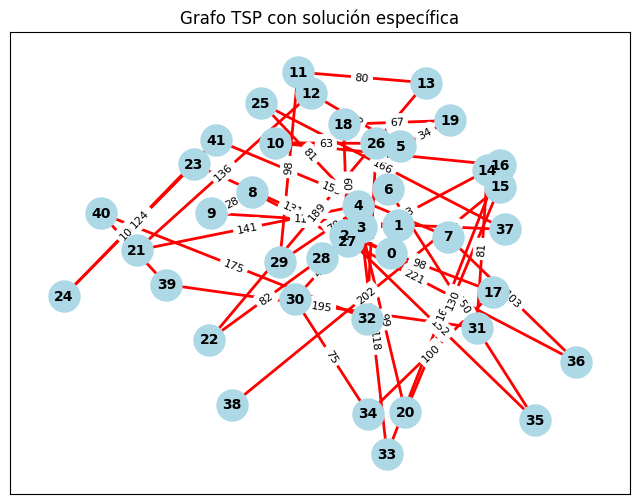

In [71]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

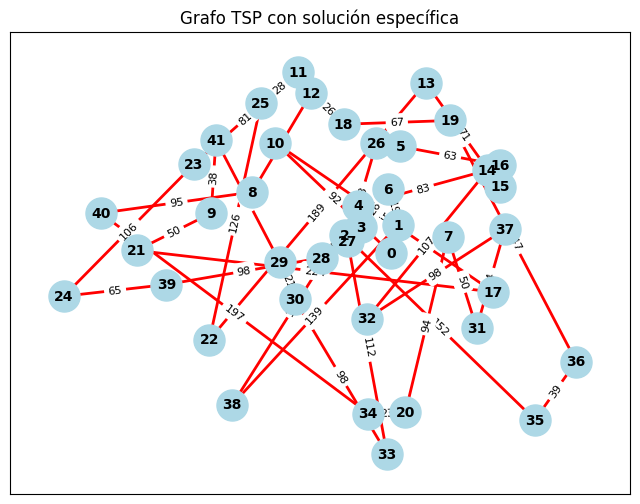

In [72]:
plot_tsp_solution(problem.edge_weights, solucion)